Examples
---

- [digits](#Digits)
- [MNIST](#MNIST)
- [IRIS](#IRIS)
- [Wine](#Wine)
- [Breast Cancer](#Breast-Cancer)
- [CovType](#CovType)

In [1]:
import emby
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time

Digits
---

epoch  0  /  5000  x  0.29071105821585747  z  0.29176230182303653
epoch  500  /  5000  x  0.32188559184854515  z  0.44565053958985745
epoch  1000  /  5000  x  0.29499122135902667  z  0.388938398357073
epoch  1500  /  5000  x  0.30884849952152305  z  0.47092432657405864
epoch  2000  /  5000  x  0.3011255314262613  z  0.4432425713146205
epoch  2500  /  5000  x  0.3371848219300996  z  0.4828653702364075
epoch  3000  /  5000  x  0.291756812907554  z  0.44974132365229635
epoch  3500  /  5000  x  0.30773927186129363  z  0.383684483217165
epoch  4000  /  5000  x  0.3335206931785331  z  0.4270739367318088
epoch  4500  /  5000  x  0.3353009384176663  z  0.4322240702790212
Time to fit transform 4.03731369972229


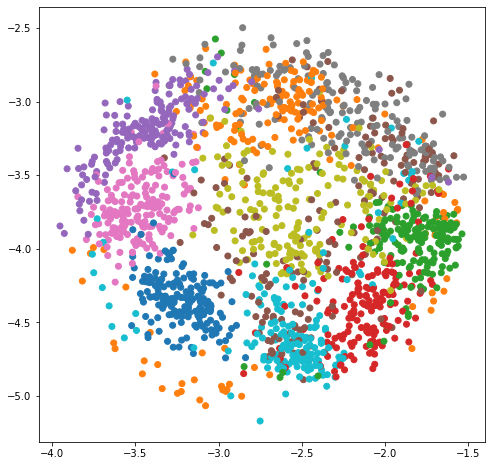

CPU times: user 4.38 s, sys: 124 ms, total: 4.51 s
Wall time: 4.34 s


In [3]:
%%time
from sklearn.datasets import load_digits

digits = load_digits()

x = digits.data
y = digits.target

x = x - x.mean()

mm = emby.MM(Z=2, 
               x_variance=40.0, 
               z_variance=1.0,
               epochs=5000,
               device=emby.Device.CPU,
               logging=emby.Logging.Progress)

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = mm.fit_transform(x)
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()


MNIST
---

Device CPU
epoch  0  /  1000  x  0.8286665523175898  z  0.32295208210567816
epoch  100  /  1000  x  0.8441370081075819  z  0.9143563493890171
epoch  200  /  1000  x  0.8514828616063426  z  0.8967902334858547
epoch  300  /  1000  x  0.8259997730350562  z  0.8308982830535991
epoch  400  /  1000  x  0.85467151255858  z  0.8953279464673223
epoch  500  /  1000  x  0.8532218986804235  z  0.8771599610413472
epoch  600  /  1000  x  0.839053504236675  z  0.8449585327884926
epoch  700  /  1000  x  0.8562485736623302  z  0.8890038487977678
epoch  800  /  1000  x  0.8529610026273357  z  0.8831474893151919
epoch  900  /  1000  x  0.8524124565189204  z  0.8766514253897527
Fitted done


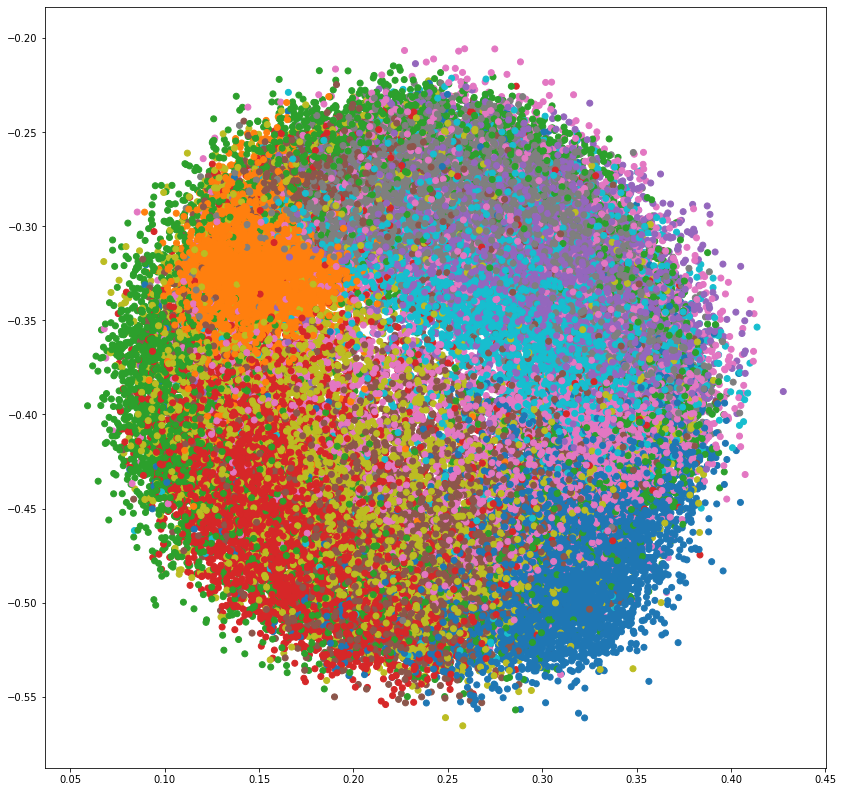

In [14]:
import tensorflow_datasets as tfds

mnist = tfds.load(name="mnist")["train"]
mnist_data = []
mnist_labels = []
for sample in tfds.as_numpy(mnist):
    image = sample["image"]
    label = sample["label"]

    mnist_data.append(image.reshape(-1) / 256)
    mnist_labels.append(label)

x, y = np.array(mnist_data), np.array(mnist_labels)

x = x - x.mean()

mm = emby.MM(Z=2, 
               x_variance=60,
               z_variance=1.0,
               epochs=1000,
               device=emby.Device.CPU,
               logging=emby.Logging.Everything)

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

embeddings = mm.fit_transform(x)
print("Fitted done")

plt.figure(figsize=(14, 14))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()


IRIS
---

epoch  0  /  5000  x  0.446399168120782  z  0.23526641416439825
epoch  500  /  5000  x  0.31497565341665845  z  0.3168054790006644
epoch  1000  /  5000  x  0.33890989278918243  z  0.3464475476287179
epoch  1500  /  5000  x  0.39234897456042783  z  0.40964683683419856
epoch  2000  /  5000  x  0.3546835281041403  z  0.3555898474108764
epoch  2500  /  5000  x  0.3780656962057999  z  0.3895843774998813
epoch  3000  /  5000  x  0.3389817933782495  z  0.3463523537810207
epoch  3500  /  5000  x  0.35220767398011515  z  0.3539537821036202
epoch  4000  /  5000  x  0.41279629787241484  z  0.4160423136603486
epoch  4500  /  5000  x  0.44616739930237476  z  0.46554271859850405
Time to fit transform 0.3451673984527588


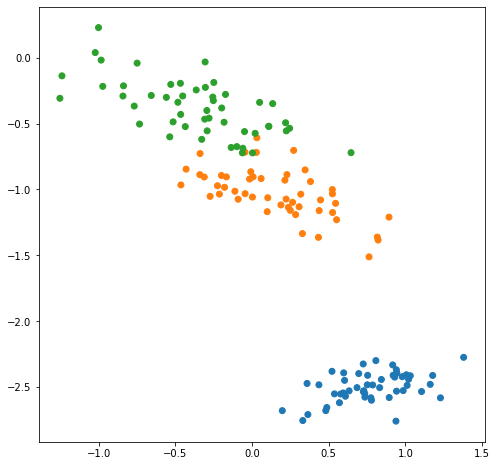

CPU times: user 552 ms, sys: 116 ms, total: 668 ms
Wall time: 506 ms


In [4]:
%%time
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data
y = iris.target

x = x - x.mean()

mm = emby.MM(Z=2, 
               x_variance=2.0, 
               epochs=5000,
               logging=emby.Logging.Progress, 
               device=emby.Device.CPU)

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = mm.fit_transform(x)
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()



Wine
---

epoch  0  /  5000  x  0.18609021022058325  z  0.23531092864857858
epoch  500  /  5000  x  0.15956696332858544  z  0.16019624252773876
epoch  1000  /  5000  x  0.18717613442277561  z  0.1876925516220918
epoch  1500  /  5000  x  0.3468702155508499  z  0.3477790221081809
epoch  2000  /  5000  x  0.29129688629917416  z  0.29199815337892066
epoch  2500  /  5000  x  0.3513452849669425  z  0.352510914951668
epoch  3000  /  5000  x  0.32840686477923914  z  0.3296921224035442
epoch  3500  /  5000  x  0.34935993686652855  z  0.3500087341134644
epoch  4000  /  5000  x  0.2358324713159772  z  0.23651977121113116
epoch  4500  /  5000  x  0.330516721553505  z  0.3313253050277155
Time to fit transform 0.4049069881439209


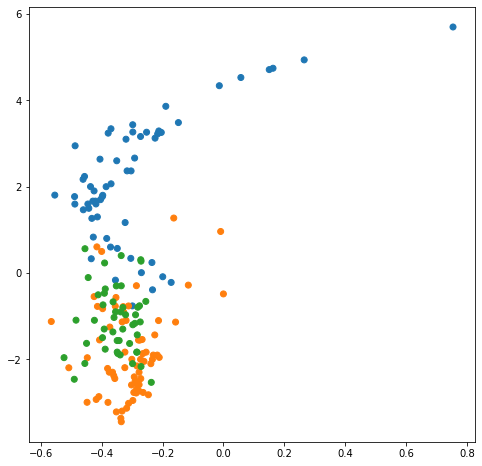

CPU times: user 620 ms, sys: 104 ms, total: 724 ms
Wall time: 564 ms


In [7]:
%%time
from sklearn.datasets import load_wine

wine = load_wine()

x = wine.data
y = wine.target

x = x - x.mean()

mm = emby.MM(Z=2, 
               x_variance=150.0, 
               epochs=5000,
               logging=emby.Logging.Progress, 
               device=emby.Device.CPU)


colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = mm.fit_transform(x)
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()

Breast Cancer
---

epoch  0  /  10000  x  0.2644647801377696  z  0.2308642902806638
epoch  1000  /  10000  x  0.0020681384736570435  z  0.0022582316878783266
epoch  2000  /  10000  x  0.30435660793185904  z  0.30438824182042934
epoch  3000  /  10000  x  0.012056410766503812  z  0.013743163418282323
epoch  4000  /  10000  x  0.334219226118377  z  0.33457763793652456
epoch  5000  /  10000  x  0.22630520517407643  z  0.22775797028774855
epoch  6000  /  10000  x  0.09274189166348361  z  0.09347555885317915
epoch  7000  /  10000  x  0.33174287133969116  z  0.3325731019231098
epoch  8000  /  10000  x  0.3043845339734482  z  0.3054582229566044
epoch  9000  /  10000  x  0.3255494602121999  z  0.3283962002681047
Time to fit transform 2.556126356124878


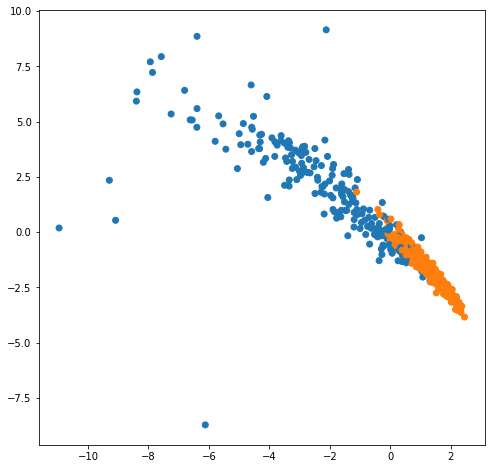

CPU times: user 2.79 s, sys: 120 ms, total: 2.91 s
Wall time: 2.75 s


In [11]:
%%time
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

x = bc.data
y = bc.target


mm = emby.MM(Z=2, 
               x_variance=200.0, 
               epochs=10000,
               logging=emby.Logging.Progress, 
               device=emby.Device.CPU)


colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = mm.fit_transform(x)
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()

CovType
---

epoch  0  /  1000  x  0.14567736084379398  z  0.24068926805889196
epoch  100  /  1000  x  0.22602232296601252  z  0.24723443995295932
epoch  200  /  1000  x  0.24086295495082227  z  0.2532781475644015
epoch  300  /  1000  x  0.19480721483658603  z  0.22601785633078922
epoch  400  /  1000  x  0.20235245788299733  z  0.21492967022774784
epoch  500  /  1000  x  0.0682066359869175  z  0.07803150872500864
epoch  600  /  1000  x  0.2175208538241609  z  0.24994701066696057
epoch  700  /  1000  x  0.07431529827288835  z  0.07957600958767247
epoch  800  /  1000  x  0.23775141437216918  z  0.25257709799608574
epoch  900  /  1000  x  0.1679314876979555  z  0.2081215818121685
Time to fit transform 263.0434854030609


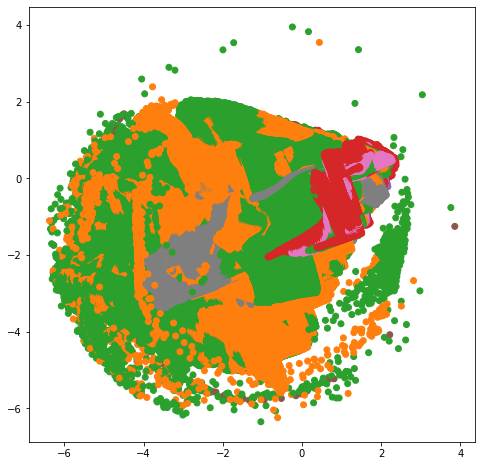

CPU times: user 4min 46s, sys: 640 ms, total: 4min 46s
Wall time: 4min 46s


In [15]:
%%time
from sklearn.datasets import fetch_covtype

data = fetch_covtype()

x = data.data
y = data.target

x = x - x.mean()

mm = emby.MM(Z=2, 
               x_variance=1000.0, 
               epochs=1000,
               logging=emby.Logging.Progress, 
               device=emby.Device.CPU)

colors = np.array(list(mcolors.TABLEAU_COLORS.values()))

timestamp = time.time()
embeddings = mm.fit_transform(x)
print(f"Time to fit transform {time.time() - timestamp}")

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=colors[y])
plt.show()